# Cálculo de  π por el método de Montecarlo
***
$$
\pi = 3,141592\\
$$
En un círculo de radio r inscrito en un cuadrado de lado 2r (2 veces el radio), el área del círculo es πr² y la del cuadrado (2r)².<br> 
De esto se deduce que la relación de área entre el circulo y el cuadrado es de π/4.

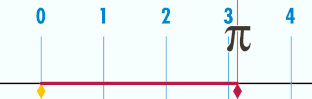
Para calcular π<br> 
1.- Elegir al azar un punto del cuadrado y observar si ese punto pertenece al círculo (interior) o no (exterior).<br> 
2.- La probabilidad de que esté dentro del círculo es la razón entre las áreas: $$\frac{A_{círculo}}{A_{cuadrado}}=\frac{\pi*r^2}{4*r^2}=\frac{Número puntos dentro del círculo}{Número de puntos totales}$$
3.- Despejando tendremos una aproximación de π. $$\begin{equation}\pi=\frac{\sum Números dentro del círculo*4}{N} \end{equation}$$ 

In [4]:
import random # Utilizar random para generar números aleatorios. 
import matplotlib.pyplot as plt
import numpy as np

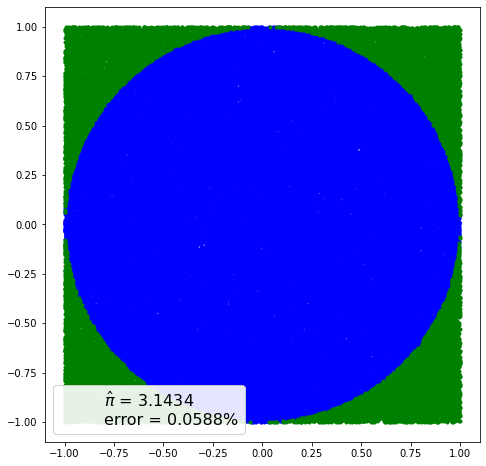

In [5]:
def mc_pi(N=100000):
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N    
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    
    #Gráfico
    plt.figure(figsize=(8,8))  # Tamaño de la figura
    plt.plot(x[interior], y[interior], 'b.') # Valores dentro del círculo
    plt.plot(x[exterior], y[exterior], 'g.') # Valores fuera del círculo
    
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)  # Etiqueta 
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)    

mc_pi()


Valor calculado de pi: 3.141216 
Desviación 0.016176993045680644
Error valor de PI 3,141592 - media calculada:  0.011968454210481629


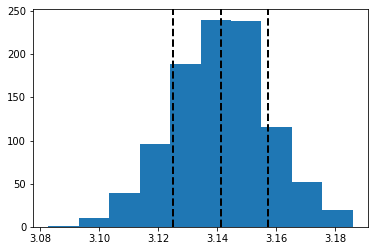

In [6]:
from scipy.stats import norm
a=([])
N=10000  
for i in range(1000):
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N    
    a=np.append(a,pi)    
sigma=a.std()
mu=a.mean()
s=np.random.normal(mu,sigma,1000)
err = abs((3.141592 - mu) / 3.141592)*100
print("Valor calculado de pi:",mu,"\nDesviación",sigma)
print("Error valor de PI 3,141592 - media calculada: ",err)
plt.hist(a)  
plt.axvline(a.mean(),color='k', linestyle='dashed', linewidth=2) 
plt.axvline(a.mean()+a.std(),color='k', linestyle='dashed', linewidth=2) 
plt.axvline(a.mean()-a.std(),color='k', linestyle='dashed', linewidth=2) 
plt.show()

> Referencia
> Lopez Briega,R. (10 de Enero de 2017). Introducción a los métodos de Montecarlo con Python.<br> 
> Enlace  https://relopezbriega.github.io/blog/2017/01/10/introduccion-a-los-metodos-de-monte-carlo-con-python